# Импорт библиотек

In [61]:
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

# Настройка CometML
<img src='https://camo.githubusercontent.com/b35adf34bc440ea2ac19bb0d3432f48e26d71ab8e4c256e936b709eec44f5b19/68747470733a2f2f7777772e636f6d65742e6d6c2f696d616765732f6c6f676f5f636f6d65745f6c696768742e706e67' width=500px>

In [62]:
#!pip install comet_ml

In [63]:
from comet_ml import Experiment

In [64]:
# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key='6FidMsxMXQpXLWFyT1pA6zMzA',
    project_name='medical-appointment',
    workspace='andrbr-br',
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/andrbr-br/medical-appointment/4f161ba86c974d77ad8740773a47ca1e

COMET INFO: Couldn't find a Git repository in 'c:\\Users\\USER\\Desktop\\Data_info\\VS_Studio\\EDA-5. Проектирование экспериментов\\5. Планирование эксперимента и логирование изменений в Comet.ml. Практика' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


# Загрузка данных

In [65]:
df = pd.read_csv('./KaggleV2-May-2016.csv')

In [66]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Визуализация

### Распределение числовых признаков

{'web': 'https://www.comet.com/api/image/download?imageId=1dd64f3f038a4deea16846b3a90ea9f2&experimentKey=4f161ba86c974d77ad8740773a47ca1e',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=1dd64f3f038a4deea16846b3a90ea9f2&experimentKey=4f161ba86c974d77ad8740773a47ca1e',
 'imageId': '1dd64f3f038a4deea16846b3a90ea9f2'}

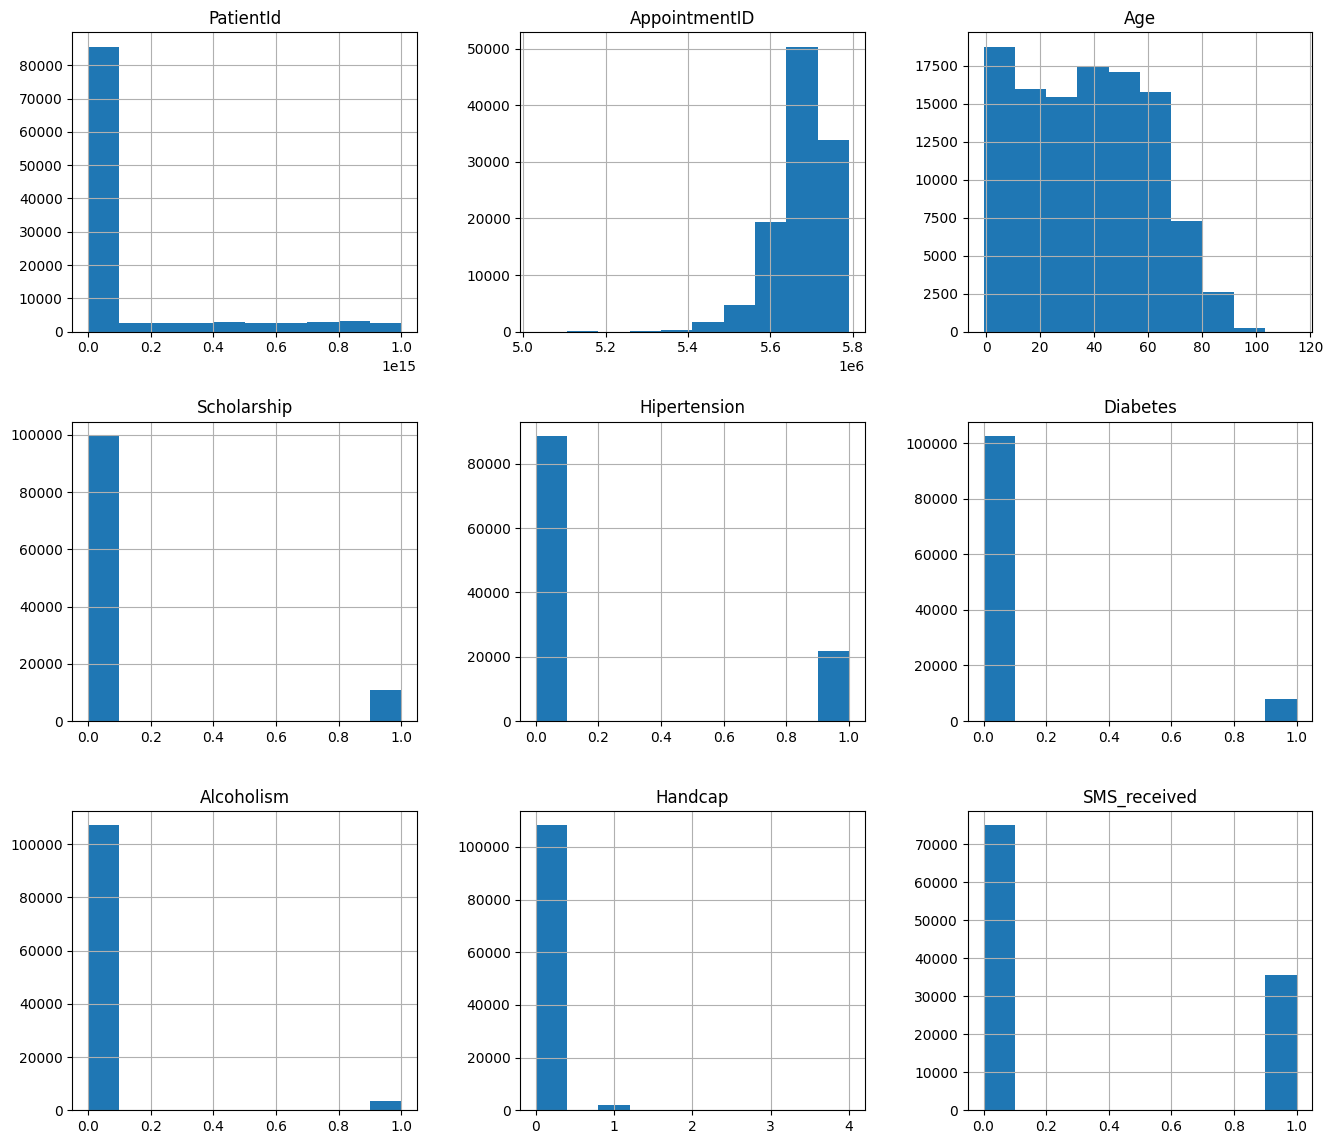

In [67]:
df.hist(figsize=(16,14))
#логируем гистограмму
experiment.log_figure(figure=plt)

*Проанализируем число людей каждого возраста*

In [68]:
print("Уникальные значения в `Age` => {}".format(df.Age.unique()))

Уникальные значения в `Age` => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


In [69]:
# Удалим аномальные значения
df = df[(df.Age >= 0) & (df.Age <= 110)]
df.Age.value_counts()

Age
0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
97       11
98        6
100       4
102       2
99        1
Name: count, Length: 102, dtype: int64

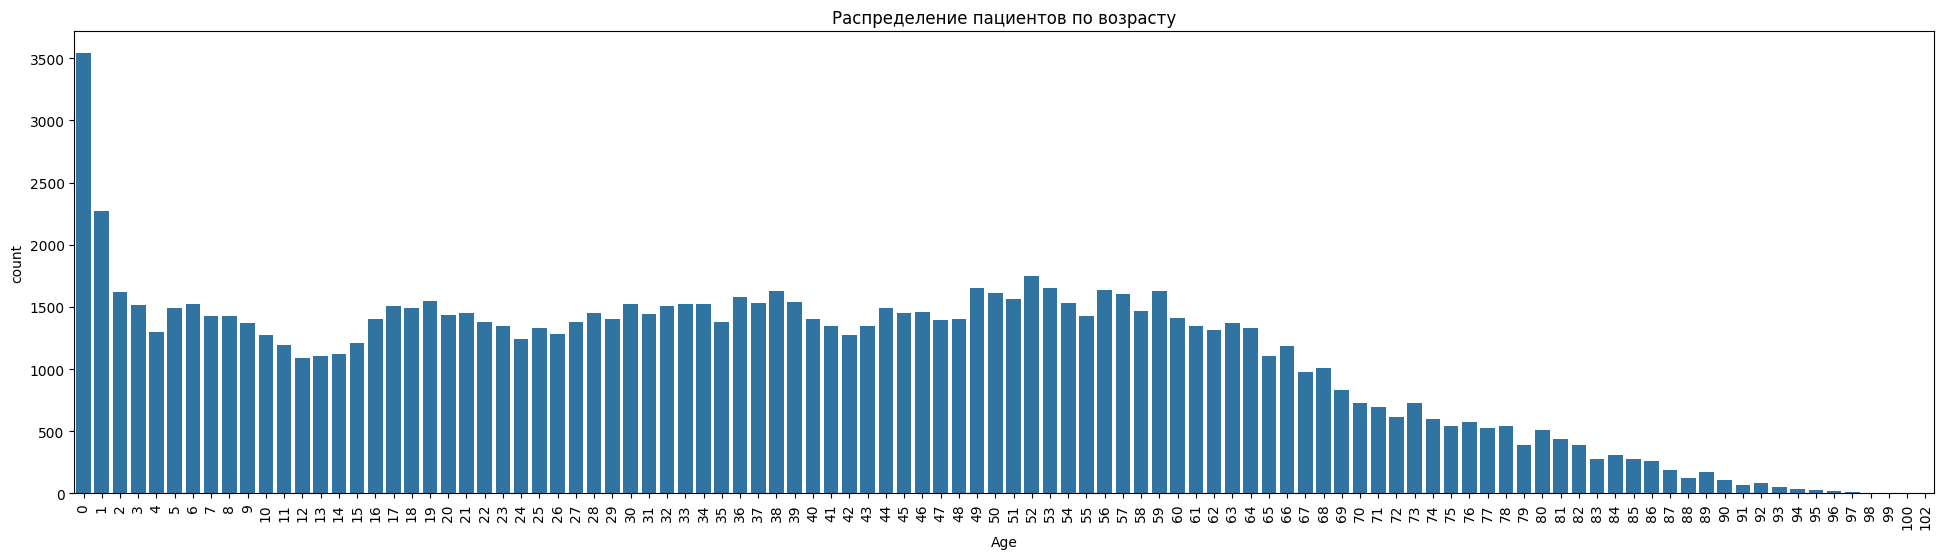

In [70]:
plt.figure(figsize=(24,6))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("Распределение пациентов по возрасту")
experiment.log_figure(figure=plt)
plt.show()

# Придет ли пациент на назначенный прием? 

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110521 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110521 non-null  float64
 1   AppointmentID   110521 non-null  int64  
 2   Gender          110521 non-null  object 
 3   ScheduledDay    110521 non-null  object 
 4   AppointmentDay  110521 non-null  object 
 5   Age             110521 non-null  int64  
 6   Neighbourhood   110521 non-null  object 
 7   Scholarship     110521 non-null  int64  
 8   Hipertension    110521 non-null  int64  
 9   Diabetes        110521 non-null  int64  
 10  Alcoholism      110521 non-null  int64  
 11  Handcap         110521 non-null  int64  
 12  SMS_received    110521 non-null  int64  
 13  No-show         110521 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


## Кодировка категориальных признаков

In [72]:
df_numeric = df[['Age', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']]
df_numeric.to_csv('numeric_data.csv', index=False)

# Читаем файл с числовыми данными
numeric_data = pd.read_csv('numeric_data.csv')
numeric_data.head()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,62,0,1,0,0,0,0
1,56,0,0,0,0,0,0
2,62,0,0,0,0,0,0
3,8,0,0,0,0,0,0
4,56,0,1,1,0,0,0


## Тепловая матрица корреляции

{'web': 'https://www.comet.com/api/image/download?imageId=f1e7035b76ac40eda56c397a9f1c82b7&experimentKey=4f161ba86c974d77ad8740773a47ca1e',
 'api': 'https://www.comet.com/api/rest/v1/image/get-image?imageId=f1e7035b76ac40eda56c397a9f1c82b7&experimentKey=4f161ba86c974d77ad8740773a47ca1e',
 'imageId': 'f1e7035b76ac40eda56c397a9f1c82b7'}

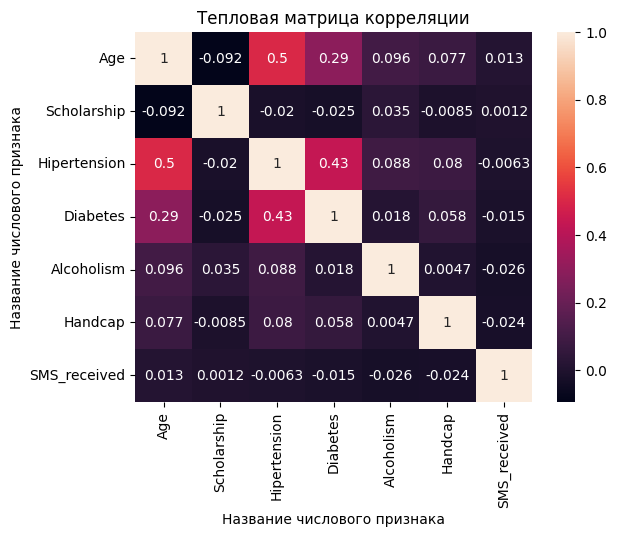

In [73]:
sns.heatmap(numeric_data.corr(numeric_only = True), annot = True)
plt.title('Тепловая матрица корреляции');
plt.xlabel('Название числового признака');
plt.ylabel('Название числового признака');

experiment.log_figure() 

# Логирование метрик

In [ ]:
experiment.display()

In [74]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     name                  : sole_ocelot_5363
COMET INFO:     url                   : https://www.comet.com/andrbr-br/medical-appointment/4f161ba86c974d77ad8740773a47ca1e
COMET INFO:   Uploads:
COMET INFO:     environment details : 1
COMET INFO:     figures             : 3
COMET INFO:     filename            : 1
COMET INFO:     installed packages  : 1
COMET INFO:     notebook            : 1
COMET INFO:     source_code         : 1
COMET INFO: 
COMET INFO: Uploading 15 metrics, params and output messages


# Домашнее задание

Визуализируйте корреляцию между числовыми признаками, использованными для обучения модели и залогируйте изображение в Comet.

В качестве ответа приложите обновленный ноутбук.

*Форма оценки ментором:*

1) Проведена визуализация корреляции между 7 числовыми признаками, использованными для обучения модели - 5 баллов

2) Произведено логирование графика в CometMl - 10 баллов

